# EDA Hotel bookings challenge

# Lectura de datos

* Importar librerias

In [302]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from pandasql import sqldf 
pysqldf = lambda q: sqldf(q, globals())
pd.set_option('display.max_columns', None)

* Leer dataset

In [303]:
df = pd.read_csv('./hotel_bookings_challenge.csv', sep=':')
df

,Unnamed: 0,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date,type,reservation_type_code
0,0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,2015-07-01,2014-07-24,double,1
1,1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,2015-07-01,2013-06-24,double,1
2,2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,2015-07-01,2015-06-24,double,1
3,3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,2015-07-01,2015-06-18,double,1
4,4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,2015-07-01,2015-06-17,double,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,City Hotel,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,128.70,0,2,2016-10-17,2016-04-16,double,1
99996,99996,City Hotel,0,1,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,117.00,0,2,2016-10-17,2016-08-19,double,1
99997,99997,City Hotel,0,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,333.0,0,Transient-Party,100.75,0,0,2016-10-16,2016-02-03,double,1
99998,99998,City Hotel,0,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,333.0,0,Transient-Party,100.75,0,0,2016-10-16,2016-02-03,double,1


# Data cleansing

###  Duplicados

In [304]:
df.duplicated().any() #aparece que no hay duplicados por la columna unnamed 

False

### Columnas sin información

In [305]:
df['reservation_type_code'].unique() # un unico valor, no aporta info

array([1])

In [306]:
df['type'].unique() # un unico valor, no aporta info

array(['double'], dtype=object)

In [307]:
# Eliminamos las columnas que no contienen info útil
df = df.drop(columns=['Unnamed: 0','reservation_type_code','type'])

In [308]:
# una vez eliminada la columna unnamed (tomada como identificador automatico) aparece que hay duplicados
# para este caso no tiene sentido quitarlos si no hay otro identificador puesto que puede haber dos reservas o mas que sean iguales
df.duplicated().any() 

True

### Valores nulos

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           100000 non-null  object 
 1   is_canceled                     100000 non-null  int64  
 2   adults                          100000 non-null  int64  
 3   children                        99996 non-null   float64
 4   babies                          100000 non-null  int64  
 5   meal                            100000 non-null  object 
 6   country                         99513 non-null   object 
 7   market_segment                  100000 non-null  object 
 8   distribution_channel            100000 non-null  object 
 9   is_repeated_guest               100000 non-null  int64  
 10  previous_cancellations          100000 non-null  int64  
 11  previous_bookings_not_canceled  100000 non-null  int64  
 12  reserved_room_typ

In [310]:
# BUSCAMOS LOS VALORES NULOS
df.isnull().sum().sort_values(ascending = False)[:5]

company         94077
agent           14435
country           487
children            4
booking_date        0
dtype: int64

In [311]:
# RELLENAMOS LOS NULOS CON DATOS QUE PODRIAN SERNOS DE MAYOR UTILIDAD
df['company'].fillna(0, inplace = True)
df['agent'].fillna(0, inplace = True)
df['children'].fillna(df['children'].mean(), inplace = True)
df['country'].fillna('Unknown', inplace = True)

In [312]:
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,2015-07-01,2014-07-24
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,2015-07-01,2013-06-24
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,2015-07-01,2015-06-24
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,2015-07-01,2015-06-18
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,2015-07-01,2015-06-17


### Modificación tipo de dato

In [313]:
# VEMOS TODAS LAS COLUMNAS CON EL TIPO DE DATO QUE TIENEN PARA VER CUALES NECESITAN SER MODIFICADAS
df.dtypes

hotel                              object
is_canceled                         int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
arrival_date                      

In [314]:
# MODIFICAMOS EL TIPO DE LAS SIGUIENTES COLUMNAS
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format = '%Y-%m-%d')
df['booking_date'] = pd.to_datetime(df['booking_date'], format = '%Y-%m-%d')

In [315]:
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date
0,Resort Hotel,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.00,0,0,2015-07-01,2014-07-24
1,Resort Hotel,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.00,0,0,2015-07-01,2013-06-24
2,Resort Hotel,0,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.00,0,0,2015-07-01,2015-06-24
3,Resort Hotel,0,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.00,0,0,2015-07-01,2015-06-18
4,Resort Hotel,0,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,2015-07-01,2015-06-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,City Hotel,0,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,128.70,0,2,2016-10-17,2016-04-16
99996,City Hotel,0,1,0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,117.00,0,2,2016-10-17,2016-08-19
99997,City Hotel,0,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,333,0,Transient-Party,100.75,0,0,2016-10-16,2016-02-03
99998,City Hotel,0,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,333,0,Transient-Party,100.75,0,0,2016-10-16,2016-02-03


### Estudio de outliers
Estudiamos el dataset por partes para detectar valores fuera de lo comun y observar mas datos

In [316]:
df.describe(include='object') 

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,2,5,169,8,5,10,12,3,4
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient
freq,59940,78096,45875,44658,81750,71672,61070,85253,73765


In [317]:
df.describe(include='int64') # detectamos maximos bastante fuera de lo comun en 'adults', 'children y 'babies' si comparamos con su media

,is_canceled,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.442070,1.855180,0.102160,0.008260,0.035490,0.103800,0.160390,0.207940,83.32013,10.642840,2.754230,0.068790,0.516830
std,0.496635,0.587716,0.396592,0.100359,0.185016,0.921528,1.632382,0.629464,111.11998,52.800234,19.155146,0.256434,0.762222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.00000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.00000,543.000000,391.000000,8.000000,5.000000


In [318]:
df.describe(include='float64') #detectamos minimos fuera de lo comun en 'adr'

,adr
count,100000.000000
mean,99.478089
std,51.674414
min,-6.380000
25%,65.000000
50%,90.065000
75%,123.000000
max,5400.000000


In [319]:
df.describe(include='datetime64[ns]')

,arrival_date,booking_date
count,100000,100000
unique,793,984
top,2015-12-05 00:00:00,2014-10-17 00:00:00
freq,448,2511
first,2015-07-01 00:00:00,2013-06-24 00:00:00
last,2017-08-31 00:00:00,2017-08-31 00:00:00


In [320]:
# INCLUIMOS COLUMNAS CON AGRUPACIONES QUE PODRIAN SER DE INTERÉS PARA EL ANÁLISIS
df['guests'] = df['adults']+df['children']+df['babies'] # para ver el numero total de huespedes por habitacion
df['Year'] = df['arrival_date'].dt.year 
df['Month'] = df['arrival_date'].dt.month
df['days_in_advance'] = df['arrival_date'] - df['booking_date'] # para ver los dias de antelacion con los que se reserva

In [321]:
# max dias de antelacion (709) 
# max dias en lista de espera (391) 
# ahora el dato tiene sentido, podriamos considerarlo para familias que planean con mucha antelacion sus viajes

df.describe(include='timedelta64[ns]') 

,days_in_advance
count,100000
mean,106 days 08:09:12.672000
std,108 days 05:14:47.415332
min,0 days 00:00:00
25%,18 days 00:00:00
50%,71 days 00:00:00
75%,165 days 00:00:00
max,737 days 00:00:00


In [322]:
df[df['days_in_advance'] > '365 days'] # más de 2400 registros que planean sus viajes con más de un año de antelación

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date,guests,Year,Month,days_in_advance
1,Resort Hotel,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.00,0,0,2015-07-01,2013-06-24,2,2015,7,737 days
81,Resort Hotel,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,40,0,0,Contract,55.68,0,0,2015-07-03,2014-06-30,2,2015,7,368 days
225,Resort Hotel,0,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40,0,0,Contract,89.68,0,0,2015-07-08,2014-06-09,2,2015,7,394 days
245,Resort Hotel,0,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,40,0,0,Contract,134.73,0,0,2015-07-09,2014-07-08,2,2015,7,366 days
890,Resort Hotel,0,1,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,40,0,0,Contract,77.54,0,0,2015-08-03,2014-04-30,1,2015,8,460 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99732,City Hotel,0,2,0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,0,0,Transient-Party,115.00,0,1,2016-10-14,2015-10-03,2,2016,10,377 days
99733,City Hotel,0,1,0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,6,0,0,Transient-Party,90.00,0,1,2016-10-14,2015-10-03,1,2016,10,377 days
99734,City Hotel,0,2,0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,0,0,Transient-Party,115.00,0,1,2016-10-14,2015-10-03,2,2016,10,377 days
99738,City Hotel,0,1,0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,6,0,0,Transient-Party,90.00,0,0,2016-10-14,2015-10-03,1,2016,10,377 days


* Buscamos y eliminamos los outlier que acabamos de detectar 

In [323]:
df['adults'].value_counts()

2     75739
1     19161
3      4764
0       272
4        48
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

In [324]:
df[df['adults'] > 6] # outlier, normalmente el maximo de adultos por habitacion serian 6

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date,guests,Year,Month,days_in_advance
1539,Resort Hotel,1,40,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,0,0,Group,0.0,0,0,2015-09-03,2014-11-03,40,2015,9,304 days
1587,Resort Hotel,1,26,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,0,0,Group,0.0,0,0,2015-09-05,2014-10-07,26,2015,9,333 days
1643,Resort Hotel,1,50,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,0,0,Group,0.0,0,0,2015-09-07,2014-10-06,50,2015,9,336 days
1752,Resort Hotel,1,26,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,0,0,Group,0.0,0,0,2015-09-12,2014-10-07,26,2015,9,340 days
1884,Resort Hotel,1,26,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,0,0,Group,0.0,0,0,2015-09-19,2014-10-07,26,2015,9,347 days
1917,Resort Hotel,1,27,0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,0,0,Group,0.0,0,0,2015-09-21,2014-10-07,27,2015,9,349 days
1962,Resort Hotel,1,27,0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,0,0,Group,0.0,0,0,2015-09-24,2014-10-07,27,2015,9,352 days
2003,Resort Hotel,1,26,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,0,0,Group,0.0,0,0,2015-09-26,2014-10-07,26,2015,9,354 days
2164,Resort Hotel,1,26,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,0,0,Group,0.0,0,0,2015-10-03,2014-10-07,26,2015,10,361 days
2173,Resort Hotel,1,55,0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,0,0,Group,0.0,0,0,2015-10-04,2014-10-31,55,2015,10,338 days


In [325]:
df['children'].value_counts() 

0     92978
1      3884
2      3089
3        48
10        1
Name: children, dtype: int64

In [326]:
df[df['children'] == 10] # outlier

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date,guests,Year,Month,days_in_advance
328,Resort Hotel,1,2,10,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8,0,0,Contract,133.16,0,1,2015-07-12,2015-05-18,12,2015,7,55 days


In [327]:
df['babies'].value_counts() 

0     99204
1       781
2        13
10        1
9         1
Name: babies, dtype: int64

In [328]:
df[df['babies'] > 5] # outlier

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date,guests,Year,Month,days_in_advance
46619,City Hotel,0,2,0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9,0,0,Transient,84.45,0,1,2016-01-12,2015-12-06,12,2016,1,37 days
78656,City Hotel,0,1,0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95,0,0,Transient-Party,95.00,0,0,2015-10-11,2015-09-30,10,2015,10,11 days


In [329]:
df[df['adr'] <= 0] # no tiene mucho sentido que el precio medio que se paga por una habitacion sea =< 0

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date,guests,Year,Month,days_in_advance
0,Resort Hotel,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,2015-07-01,2014-07-24,2,2015,7,342 days
1,Resort Hotel,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,2015-07-01,2013-06-24,2,2015,7,737 days
125,Resort Hotel,0,4,0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,0,0,0,Transient,0.0,0,1,2015-07-04,2015-06-02,4,2015,7,32 days
167,Resort Hotel,0,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240,0,0,Transient,0.0,0,2,2015-07-06,2015-03-17,2,2015,7,111 days
168,Resort Hotel,0,1,0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250,0,0,Transient,0.0,0,0,2015-07-06,2015-07-06,1,2015,7,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99652,City Hotel,0,1,0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,56,0,0,Transient-Party,0.0,0,0,2016-10-13,2015-11-13,1,2016,10,335 days
99735,City Hotel,0,1,0,0,BB,PRT,Complementary,Direct,0,0,0,A,A,3,No Deposit,0,45,0,Transient,0.0,0,0,2016-10-02,2016-09-29,1,2016,10,3 days
99774,City Hotel,0,0,0,0,BB,USA,Direct,Direct,0,0,0,D,D,1,No Deposit,14,0,0,Transient,0.0,0,0,2016-10-12,2016-06-20,0,2016,10,114 days
99810,City Hotel,0,2,0,0,SC,PRT,Online TA,TA/TO,1,0,0,A,A,0,No Deposit,9,0,0,Transient,0.0,0,2,2016-10-19,2016-10-19,2,2016,10,0 days


In [330]:
df.drop(df[(df['adults'] > 6)].index, inplace=True)
df.drop(df[(df['children'] > 6)].index, inplace=True)
df.drop(df[(df['babies'] > 6)].index, inplace=True) # mantenemos numeros de huespedes reales y que tienen sentido en el sector hotelero
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True) # registros sin ningun huesped, tampoco tiene sentido mantenerlos
df.drop(df[(df['adr'] <= 0)].index, inplace=True) # dejamos el precio medio por habitacion positivo

In [331]:
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date,guests,Year,Month,days_in_advance
2,Resort Hotel,0,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.00,0,0,2015-07-01,2015-06-24,1,2015,7,7 days
3,Resort Hotel,0,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.00,0,0,2015-07-01,2015-06-18,1,2015,7,13 days
4,Resort Hotel,0,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,2015-07-01,2015-06-17,2,2015,7,14 days
5,Resort Hotel,0,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,2015-07-01,2015-06-17,2,2015,7,14 days
6,Resort Hotel,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,0,Transient,107.00,0,0,2015-07-01,2015-07-01,2,2015,7,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,City Hotel,0,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,128.70,0,2,2016-10-17,2016-04-16,2,2016,10,184 days
99996,City Hotel,0,1,0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,117.00,0,2,2016-10-17,2016-08-19,1,2016,10,59 days
99997,City Hotel,0,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,333,0,Transient-Party,100.75,0,0,2016-10-16,2016-02-03,2,2016,10,256 days
99998,City Hotel,0,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,333,0,Transient-Party,100.75,0,0,2016-10-16,2016-02-03,2,2016,10,256 days


### Exportación nuevo fichero CSV

In [332]:
df.to_csv('hoteles_modif_1.csv') # guardamos nuestro df limpio 

# Análisis exploratorio de los datos (EDA)

## Correlaciones

Observamos de un vistazo que variables se correlacionan de manera positiva:

* Las cancelaciones suelen coincidir con previas cancelaciones
* Los huéspedes que repiten, no suelen tener previas cancelaciones
* El ADR (tarifa promedio) se relaciona con los huéspedes adultos y niños, asi como el año y las peticiones especiales
* Los huespédes normalmente son adultos y seguidamente niños
* Si hay bebés se realizan más peticiones especiales y más modificaciones en la reserva


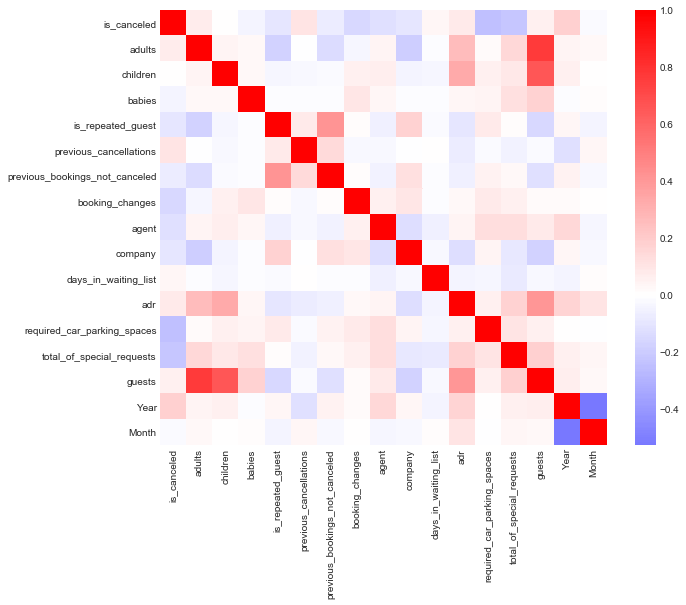

In [333]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), center=0, cmap='bwr')
plt.show()

In [334]:
df.corr()

,is_canceled,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guests,Year,Month
is_canceled,1.000000,0.071600,0.008778,-0.041601,-0.101809,0.101521,-0.070828,-0.155117,-0.123542,-0.097072,0.037353,0.076686,-0.241810,-0.221953,0.052484,0.179396,-0.013345
adults,0.071600,1.000000,0.043962,0.025148,-0.177882,-0.006665,-0.137706,-0.032521,0.044436,-0.191556,-0.009031,0.263934,0.017389,0.148333,0.769892,0.042822,0.030261
children,0.008778,0.043962,1.000000,0.026793,-0.033682,-0.026575,-0.021735,0.052646,0.067678,-0.041889,-0.036104,0.333088,0.059720,0.089441,0.655624,0.062065,0.000755
babies,-0.041601,0.025148,0.026793,1.000000,-0.012055,-0.008898,-0.007914,0.099288,0.038819,-0.008667,-0.012549,0.039278,0.042002,0.118287,0.176374,-0.011058,0.014030
is_repeated_guest,-0.101809,-0.177882,-0.033682,-0.012055,1.000000,0.080432,0.417998,0.015056,-0.058773,0.172014,-0.024108,-0.097290,0.084065,0.014862,-0.154038,0.034669,-0.039402
previous_cancellations,0.101521,-0.006665,-0.026575,-0.008898,0.080432,1.000000,0.146026,-0.028332,-0.027027,-0.002090,0.003577,-0.067054,-0.022114,-0.050657,-0.022641,-0.117751,0.038696
previous_bookings_not_canceled,-0.070828,-0.137706,-0.021735,-0.007914,0.417998,0.146026,1.000000,0.014523,-0.051309,0.119111,-0.010670,-0.060148,0.049923,0.033426,-0.116359,0.047138,-0.026145
booking_changes,-0.155117,-0.032521,0.052646,0.099288,0.015056,-0.028332,0.014523,1.000000,0.055781,0.096773,-0.012076,0.034225,0.079971,0.059598,0.022589,0.018559,0.004070
agent,-0.123542,0.044436,0.067678,0.038819,-0.058773,-0.027027,-0.051309,0.055781,1.000000,-0.129088,-0.056947,0.040929,0.125294,0.129424,0.080241,0.151204,-0.036194
company,-0.097072,-0.191556,-0.041889,-0.008667,0.172014,-0.002090,0.119111,0.096773,-0.129088,1.000000,-0.025500,-0.130867,0.044071,-0.086360,-0.168749,0.039896,-0.029714


## Análisis univariante
* Variables numéricas
* Variables categóricas

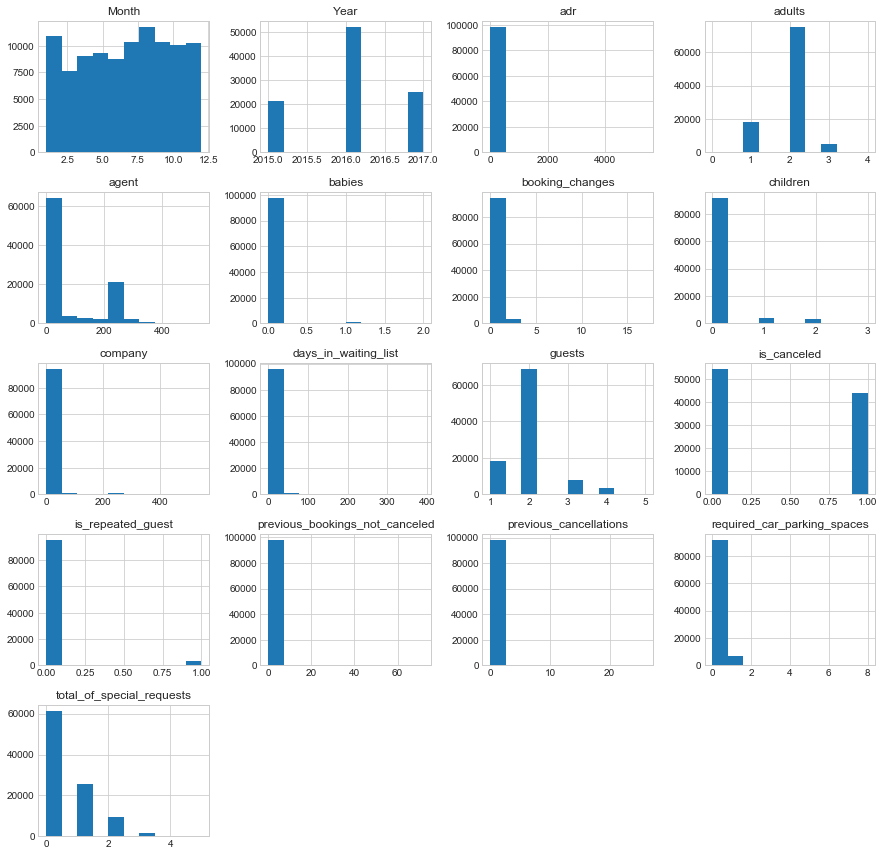

In [335]:
# HISTOGRAMAS PARA VARIABLES NUMERICAS
df.hist(figsize=(15,15));

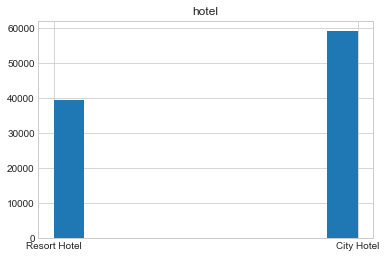

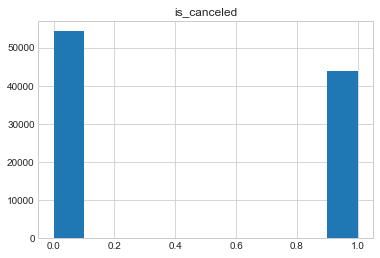

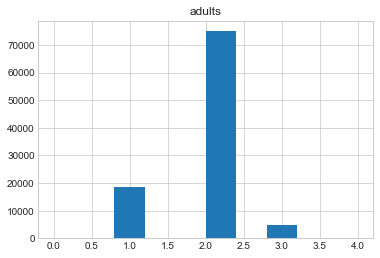

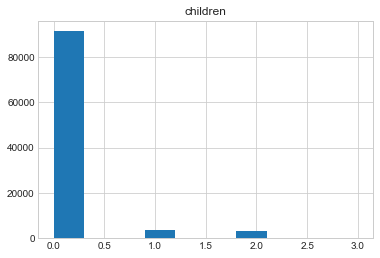

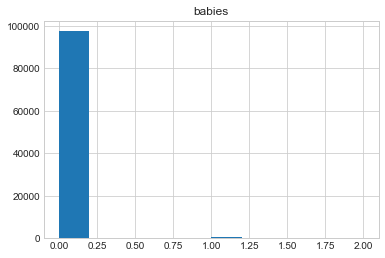

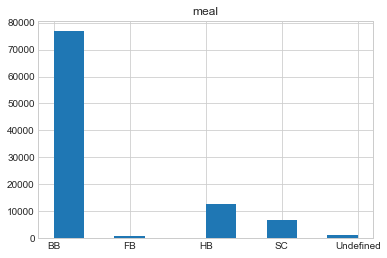

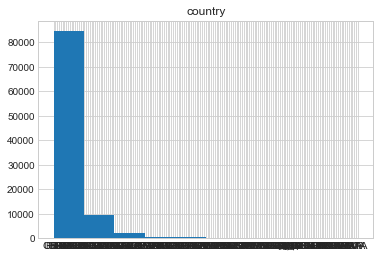

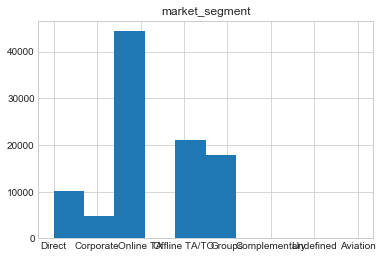

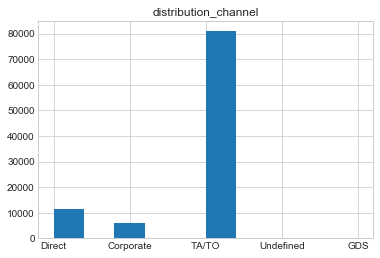

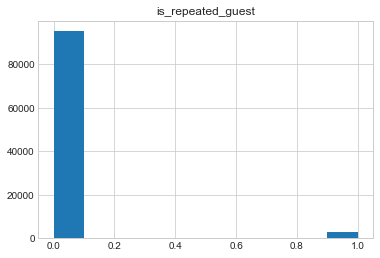

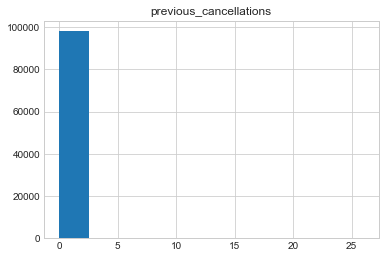

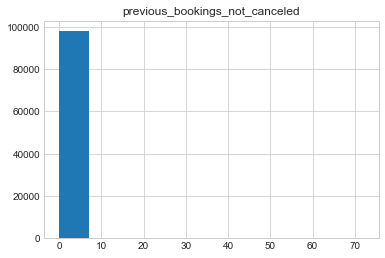

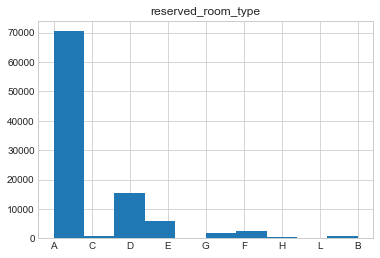

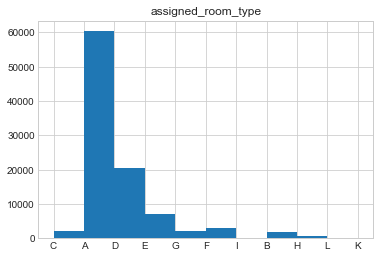

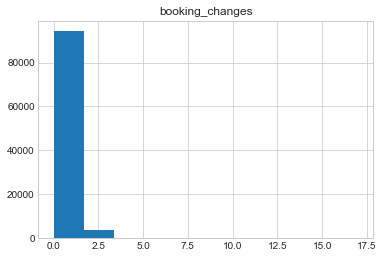

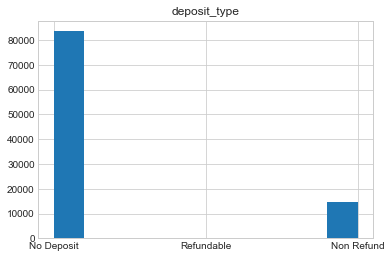

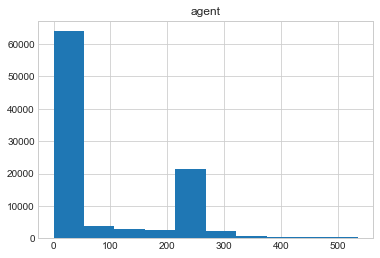

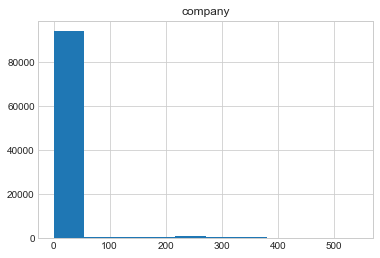

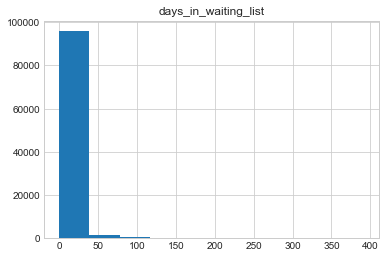

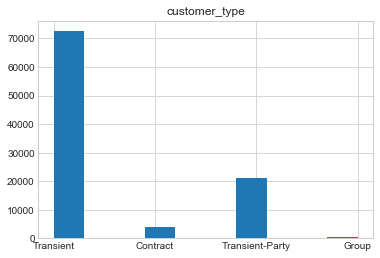

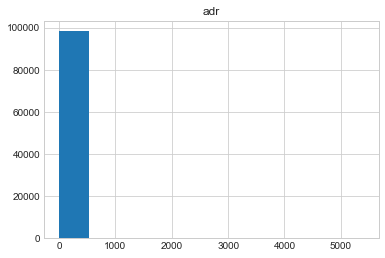

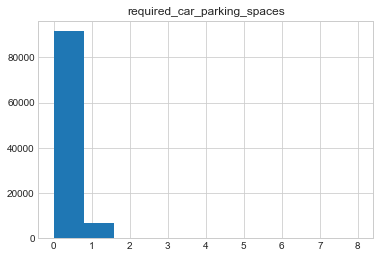

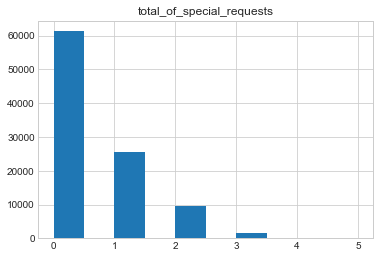

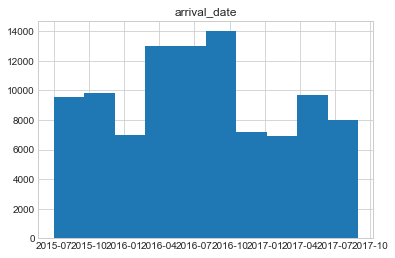

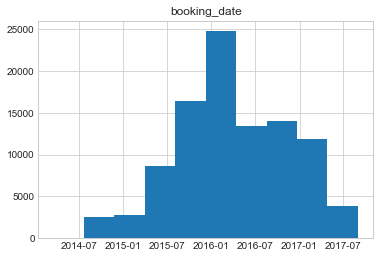

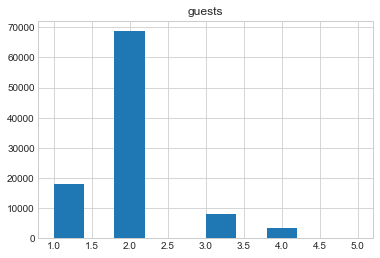

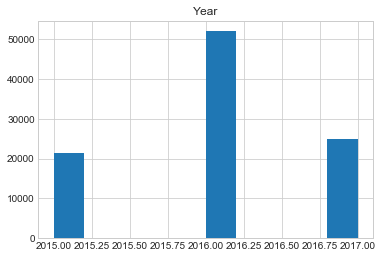

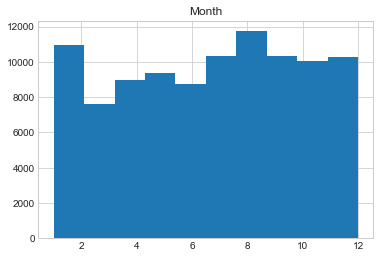

In [336]:
for col in df.columns[:-1]: 
    plt.hist(df[col])
    plt.title(col)
    plt.show();

In [337]:
df.describe(include='object') # variables categóricas

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,98311,98311,98311,98311,98311,98311,98311,98311,98311
unique,2,5,169,8,5,9,11,3,4
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient
freq,59005,76809,44553,44364,80928,70468,60361,83564,72550


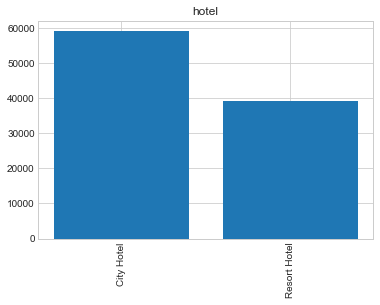

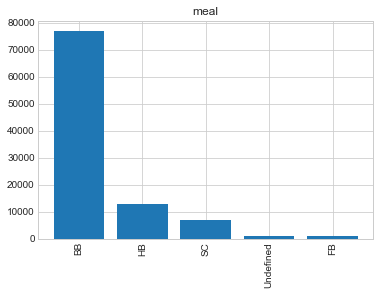

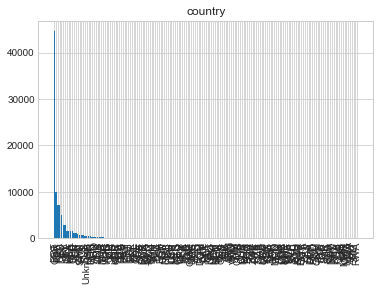

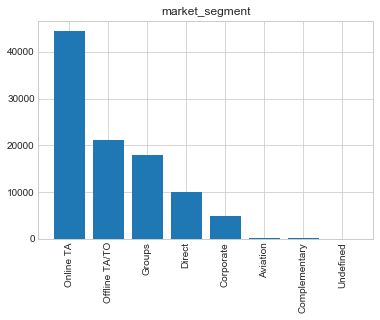

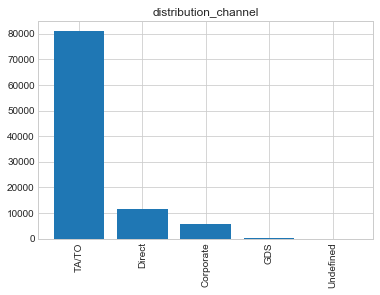

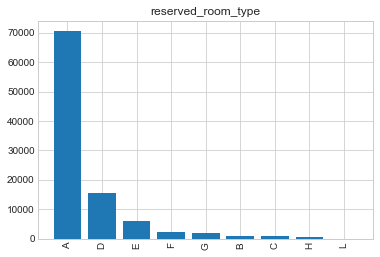

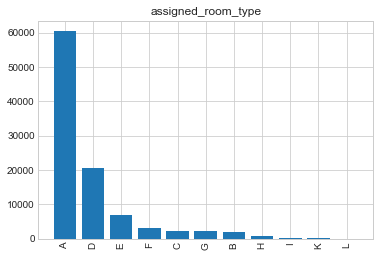

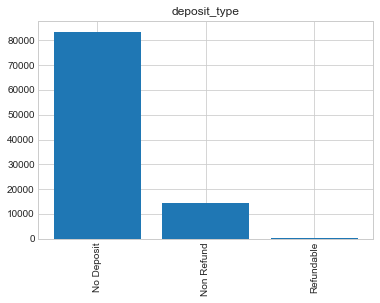

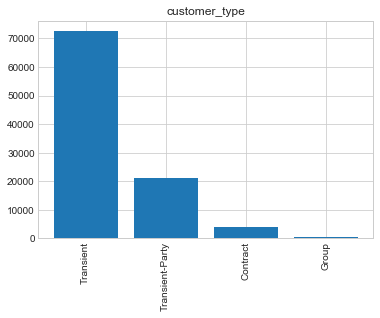

In [338]:
# GRAFICOS DE BARRAS PARA VARIABLES CATEGORICAS
for col in ['hotel', 'meal','country','market_segment', 'distribution_channel', 'reserved_room_type','assigned_room_type','deposit_type','customer_type']:
    
    #plt.figure(figsize=(8,5))

    df_mult = df[col].value_counts()

    plt.bar(df_mult.index, df_mult.values)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show();

## Estudio por partes (Cancelaciones vs. no cancelaciones)

* Creamos un DF por cada valor de la variable objetivo (is_cancel), para ver diferencias entre las reservas canceladas y las no canceladas

In [393]:
# DF DE RESERVAS CANCELADAS
df_cancel = df[df.is_canceled == 1]
df_cancel.head(4)

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date,guests,Year,Month,days_in_advance
8,Resort Hotel,1,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,82.0,0,1,2015-07-01,2015-04-07,2,2015,7,85 days
9,Resort Hotel,1,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15,0,0,Transient,105.5,0,0,2015-07-01,2015-04-17,2,2015,7,75 days
10,Resort Hotel,1,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,0,0,Transient,123.0,0,0,2015-07-01,2015-06-08,2,2015,7,23 days
27,Resort Hotel,1,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,0,0,Transient,107.0,0,2,2015-07-01,2015-05-02,2,2015,7,60 days


In [394]:
# DF DE RESERVAS NO CANCELADAS
df_notcancel = df[df.is_canceled == 0]
df_notcancel.head(4)

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date,guests,Year,Month,days_in_advance
2,Resort Hotel,0,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,2015-07-01,2015-06-24,1,2015,7,7 days
3,Resort Hotel,0,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,2015-07-01,2015-06-18,1,2015,7,13 days
4,Resort Hotel,0,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,2015-07-01,2015-06-17,2,2015,7,14 days
5,Resort Hotel,0,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,2015-07-01,2015-06-17,2,2015,7,14 days


 Estudiamos y comparamos cada DF:
 
- Lo habitual son reservas para dos personas
- Se producen mas cancelaciones en City Hotel
- Los clientes suelen ser tipo transitorio, procedentes de Portugal, reservan la habitacion tipo A con categoria BB, mediante TA y sin depósito
- Los que cancelan, no suelen haber sido clientes con anterioridad
- Las personas que ya estuvieron previamente en el hotel, no suelen anular su reserva
- La media de dias en lista de espera es de 2-3 dias
- Las cancelaciones se producen en reservas que tienen mas dias de antelacion
- El ADR, o tarifa promedio, es superior para reservas canceladas. Lo que nos indica que probablemente el cliente encuentre algo mas barato en ese periodo y anule.
- La media de las cancelaciones han sido producidas en junio de 2016
- La media de las reservas se han efectuado  en junio de 2015


In [342]:
df_cancel.describe() #cancelan con adr mas alto

,is_canceled,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guests,Year,Month,days_in_advance
count,43999.0,43999.000000,43999.000000,43999.000000,43999.000000,43999.000000,43999.000000,43999.000000,43999.000000,43999.000000,43999.000000,43999.000000,43999.0,43999.000000,43999.000000,43999.000000,43999.000000,43999
mean,1.0,1.896316,0.106593,0.003796,0.011773,0.208187,0.022501,0.098002,68.519353,4.740971,3.574672,105.474772,0.0,0.328394,2.006705,2016.172958,6.595854,145 days 05:42:16.175822
std,0.0,0.443370,0.409279,0.062226,0.107864,1.335006,0.661860,0.450853,102.118591,35.626421,21.525454,52.192525,0.0,0.648650,0.616032,0.714124,2.978381,118 days 12:53:08.020424
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,1.000000,2015.000000,1.000000,0 days 00:00:00
25%,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,73.470000,0.0,0.000000,2.000000,2016.000000,4.000000,49 days 00:00:00
50%,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,96.300000,0.0,0.000000,2.000000,2016.000000,7.000000,114 days 00:00:00
75%,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,0.000000,0.000000,127.820000,0.0,0.000000,2.000000,2017.000000,9.000000,215 days 00:00:00
max,1.0,4.000000,3.000000,2.000000,1.000000,26.000000,58.000000,16.000000,531.000000,543.000000,391.000000,5400.000000,0.0,5.000000,5.000000,2017.000000,12.000000,629 days 00:00:00


In [343]:
df_notcancel.describe()

,is_canceled,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guests,Year,Month,days_in_advance
count,54312.0,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312.000000,54312
mean,0.0,1.828160,0.099591,0.011360,0.047559,0.019020,0.247091,0.288408,96.151679,14.950913,2.128664,97.695575,0.124908,0.667808,1.939111,2015.925504,6.677714,76 days 20:39:11.215201
std,0.0,0.494175,0.386052,0.107873,0.212832,0.306718,2.030416,0.702468,116.620861,62.260094,17.159000,48.700216,0.335318,0.808830,0.657929,0.641104,3.106420,88 days 01:44:12.005795
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000,1.000000,2015.000000,1.000000,0 days 00:00:00
25%,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,64.900000,0.000000,0.000000,2.000000,2016.000000,4.000000,7 days 00:00:00
50%,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,88.500000,0.000000,0.000000,2.000000,2016.000000,7.000000,41 days 00:00:00
75%,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,120.000000,0.000000,1.000000,2.000000,2016.000000,9.000000,121 days 00:00:00
max,0.0,4.000000,3.000000,2.000000,1.000000,13.000000,72.000000,17.000000,535.000000,541.000000,379.000000,508.000000,8.000000,5.000000,5.000000,2017.000000,12.000000,709 days 00:00:00


In [344]:
df_cancel.describe(include='object') # cancelan mas 'city hotel'

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,43999,43999,43999,43999,43999,43999,43999,43999,43999
unique,2,5,128,8,5,9,11,3,4
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient
freq,32962,34338,27327,20719,40064,33469,32811,29469,36346


In [345]:
df_notcancel.describe(include='object')

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,54312,54312,54312,54312,54312,54312,54312,54312,54312
unique,2,5,153,7,5,9,10,3,4
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient
freq,28269,42471,17226,23645,40864,36999,27550,54095,36204


In [395]:
df_cancel.describe(include='timedelta64[ns]') # los que cancelan, lo hacen con mas dias de antelacion de media

,days_in_advance
count,43999
mean,145 days 05:42:16.175822
std,118 days 12:53:08.020424
min,0 days 00:00:00
25%,49 days 00:00:00
50%,114 days 00:00:00
75%,215 days 00:00:00
max,629 days 00:00:00


In [396]:
df_notcancel.describe(include='timedelta64[ns]') 

,days_in_advance
count,54312
mean,76 days 20:39:11.215201
std,88 days 01:44:12.005795
min,0 days 00:00:00
25%,7 days 00:00:00
50%,41 days 00:00:00
75%,121 days 00:00:00
max,709 days 00:00:00


## Visualizaciones

In [397]:
df.head(2)

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date,guests,Year,Month,days_in_advance
2,Resort Hotel,0,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,2015-07-01,2015-06-24,1,2015,7,7 days
3,Resort Hotel,0,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,2015-07-01,2015-06-18,1,2015,7,13 days


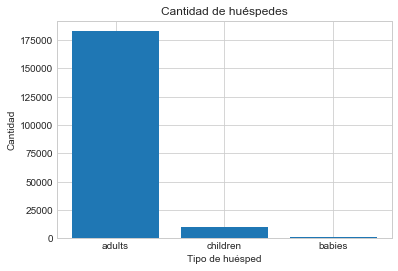

In [535]:
# Distribución de huespedes
cantidad_por_huesped = df[['adults', 'children', 'babies']].sum()

plt.bar(cantidad_por_huesped.index, cantidad_por_huesped.values)
plt.xlabel('Tipo de huésped')
plt.ylabel('Cantidad')
plt.title('Cantidad de huéspedes')
plt.show()

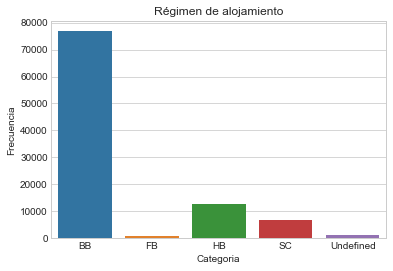

In [538]:
# Categoria de comida mas solicitada
sns.countplot(x = df['meal'])
plt.title('Régimen de alojamiento')
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')
plt.show();

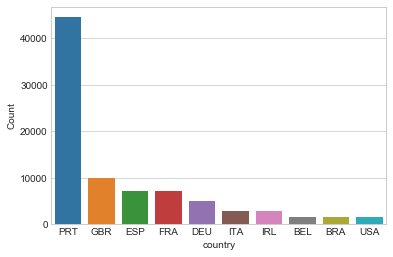

In [541]:
# Paises mas frecuentes desde donde vienen los clientes
grouped_by_country = df.groupby('country')
df_country = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = df_country['country'], y  = df_country['Count'])
plt.show()

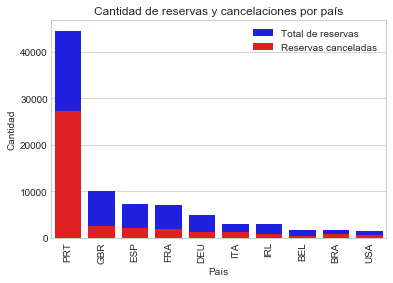

In [542]:
# Cuantas de esas reservas por pais anulan

# Cantidad total de reservas y la cantidad de reservas canceladas
country_bookings = df.groupby('country')['is_canceled'].agg([('total_bookings', 'count'), ('total_cancelled', 'sum')])

# % cancelaciones por país
country_bookings['cancel_pct'] = country_bookings['total_cancelled'] / country_bookings['total_bookings']
country_bookings = country_bookings.sort_values('total_bookings', ascending=False).head(10)

sns.barplot(x=country_bookings.index, y=country_bookings['total_bookings'], color='blue', label='Total de reservas')
sns.barplot(x=country_bookings.index, y=country_bookings['total_cancelled'], color='red', label='Reservas canceladas')
plt.title('Cantidad de reservas y cancelaciones por país')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [413]:
# ADR medio por año
df_mean = df[["Year","adr"]].groupby("Year", as_index = False).mean().sort_values(by="adr",ascending = False)
df_mean

,Year,adr
2,2017,113.837881
1,2016,99.875539
0,2015,89.566238


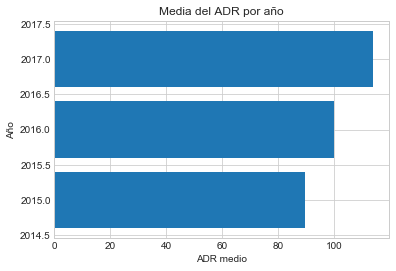

In [419]:
plt.barh(df_mean['Year'], df_mean['adr'])
plt.xlabel('ADR medio')
plt.ylabel('Año')
plt.title('Media del ADR por año')
plt.show();

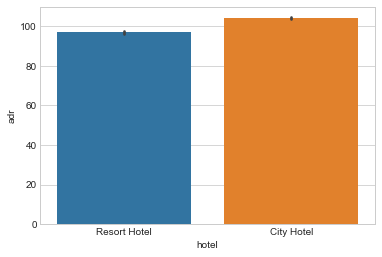

In [428]:
# ADR por cada tipo de hotel
sns.barplot(x = df['hotel'], y = df['adr'] )
plt.show()

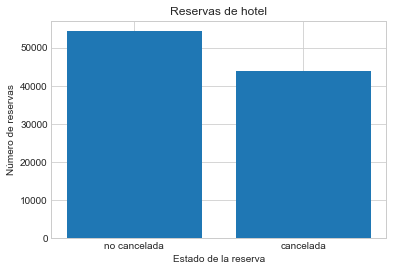

In [461]:
# Estado de las reservas
df['status'] = df['is_canceled'].map({0: 'no cancelada', 1: 'cancelada'})
reservas_por_estado = df['status'].value_counts()

plt.bar(reservas_por_estado.index, reservas_por_estado.values)
plt.xlabel('Estado de la reserva')
plt.ylabel('Número de reservas')
plt.title('Reservas de hotel')
plt.show()

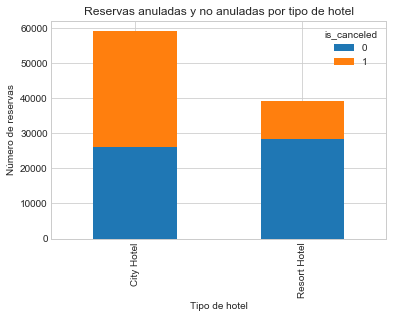

In [422]:
# Reservas anuladas y no anuladas por tipo de hotel
df_grouped_hotel = df.groupby(['hotel', 'is_canceled']).size().reset_index(name='Total')
df_pivot = df_grouped_hotel.pivot(index='hotel', columns='is_canceled', values='Total')
df_pivot.plot(kind='bar', stacked=True)

plt.xlabel('Tipo de hotel')
plt.ylabel('Número de reservas')
plt.title('Reservas anuladas y no anuladas por tipo de hotel')
plt.show();


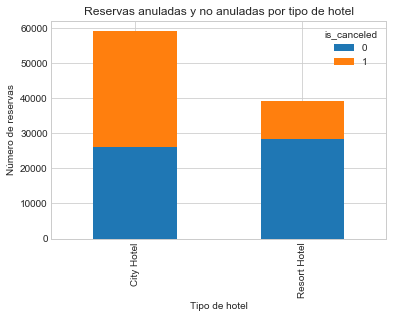

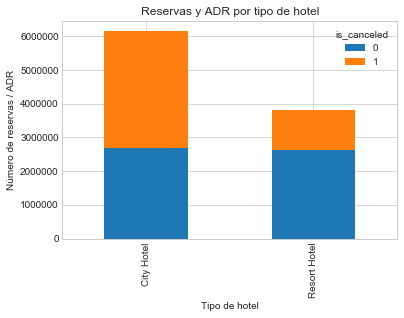

In [427]:
# Agrupar los datos por tipo de hotel y por estado de reserva, y calcular la suma del ADR para cada grupo
df_grouped = df.groupby(['hotel', 'is_canceled']).agg({'adr': 'sum', 'is_canceled': 'count'})
df_grouped = df_grouped.rename(columns={'is_canceled': 'Total reservas'})

# Reservas anuladas y no anuladas por tipo de hotel
df_pivot = df_grouped.pivot_table(index='hotel', columns='is_canceled', values='Total reservas')
df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Tipo de hotel')
plt.ylabel('Número de reservas')
plt.title('Reservas anuladas y no anuladas por tipo de hotel')
plt.show();

# ADR ganado y perdido por tipo de hotel
df_pivot_adr = df_grouped.pivot_table(index='hotel', columns='is_canceled', values='adr')
df_pivot_adr.plot(kind='bar', stacked=True)
plt.xlabel('Tipo de hotel')
plt.ylabel('Número de reservas / ADR')
plt.title('Reservas y ADR por tipo de hotel')
plt.show();


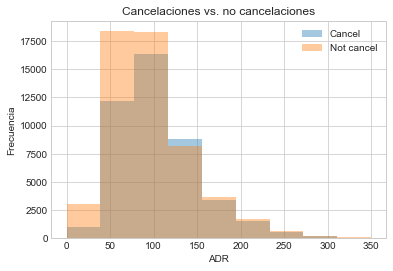

In [544]:
# ADR en funcion de las cancelaciones
bins = np.linspace(0,350,10)
plt.hist(df_cancel['adr'],alpha=0.4, label='Cancel', bins=bins)
plt.hist(df_notcancel['adr'],alpha=0.4, label='Not cancel', bins=bins)
plt.title('Cancelaciones vs. no cancelaciones')
plt.xlabel('ADR')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

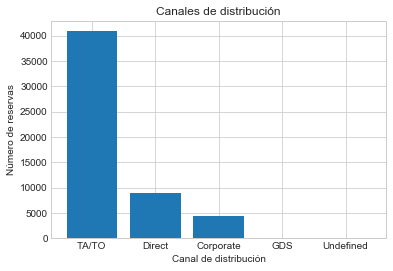

In [545]:
# Canal de distribucion mas frecuente
counts = df_notcancel['distribution_channel'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Canal de distribución')
plt.ylabel('Número de reservas')
plt.title('Canales de distribución')
plt.show()

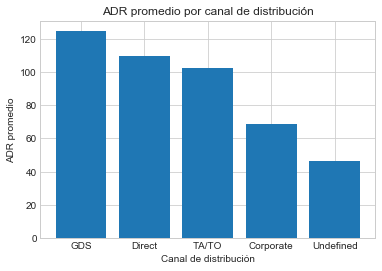

In [438]:
#ADR promedio por canal de distribución
adr_por_canal = df.groupby("distribution_channel")["adr"].mean().sort_values(ascending=False)
plt.bar(adr_por_canal.index, adr_por_canal.values)
plt.title("ADR promedio por canal de distribución")
plt.xlabel("Canal de distribución")
plt.ylabel("ADR promedio")
plt.show()

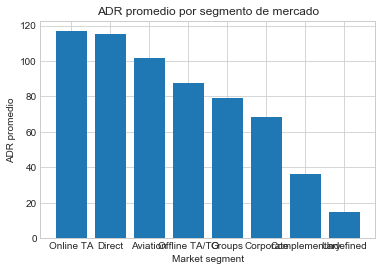

In [441]:
# ADR promedio por segmento de mercado
adr_por_mktsgmnt = df.groupby("market_segment")["adr"].mean().sort_values(ascending=False)
plt.bar(adr_por_mktsgmnt.index, adr_por_mktsgmnt.values)
plt.title("ADR promedio por segmento de mercado")
plt.xlabel("Market segment")
plt.ylabel("ADR promedio")
plt.show()

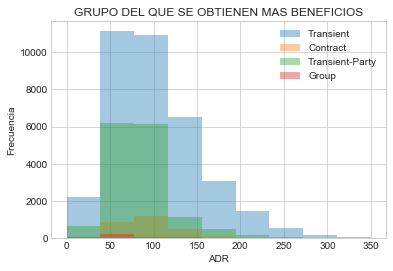

In [386]:
# GRUPO DEL QUE SE OBTIENEN MAYORES BENEFICIOS

df1__ = df_notcancel[df_notcancel['customer_type'] == 'Transient']
df2__ = df_notcancel[df_notcancel['customer_type'] == 'Contract']
df3__ = df_notcancel[df_notcancel['customer_type'] == 'Transient-Party']
df4__ = df_notcancel[df_notcancel['customer_type'] == 'Group']


bins = np.linspace(0,350,10)
#bins=10
#plt.figure(figsize=(10,6))
plt.hist(df1__['adr'],alpha=0.4, label='Transient', bins=bins)
plt.hist(df2__['adr'],alpha=0.4, label='Contract', bins=bins)
plt.hist(df3__['adr'],alpha=0.4, label='Transient-Party', bins=bins)
plt.hist(df4__['adr'],alpha=0.4, label='Group', bins=bins)


plt.title('GRUPO DEL QUE SE OBTIENEN MAS BENEFICIOS')
plt.xlabel('ADR')
plt.ylabel('Frecuencia')
plt.legend()
plt.show();

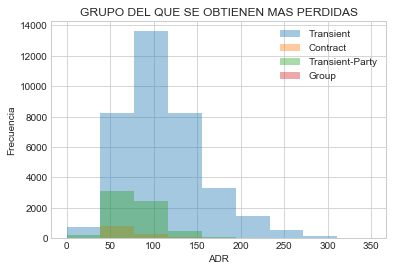

In [385]:
# GRUPO DEL QUE SE OBTIENEN MAS PERDIDAS

df1__ = df_cancel[df_cancel['customer_type'] == 'Transient']
df2__ = df_cancel[df_cancel['customer_type'] == 'Contract']
df3__ = df_cancel[df_cancel['customer_type'] == 'Transient-Party']
df4__ = df_cancel[df_cancel['customer_type'] == 'Group']


bins = np.linspace(0,350,10)
#bins=10
#plt.figure(figsize=(10,6))
plt.hist(df1__['adr'],alpha=0.4, label='Transient', bins=bins)
plt.hist(df2__['adr'],alpha=0.4, label='Contract', bins=bins)
plt.hist(df3__['adr'],alpha=0.4, label='Transient-Party', bins=bins)
plt.hist(df4__['adr'],alpha=0.4, label='Group', bins=bins)

plt.title('GRUPO DEL QUE SE OBTIENEN MAS PERDIDAS')
plt.xlabel('ADR')
plt.ylabel('Frecuencia')


plt.legend()
plt.show();

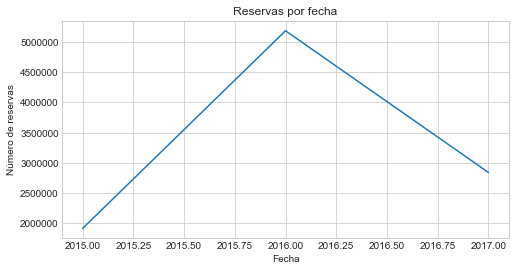

In [472]:
# Reservas por fecha
plt.figure(figsize=(8,4))
reservas_por_fecha = df.groupby("Year")["adr"].sum()
plt.plot(reservas_por_fecha.index, reservas_por_fecha.values)
plt.title("Reservas por fecha")
plt.xlabel("Fecha")
plt.ylabel("Número de reservas")
plt.show()


In [475]:
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,booking_date,guests,Year,Month,days_in_advance,status
2,Resort Hotel,0,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,2015-07-01,2015-06-24,1,2015,7,7 days,no cancelada
3,Resort Hotel,0,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,2015-07-01,2015-06-18,1,2015,7,13 days,no cancelada
4,Resort Hotel,0,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,2015-07-01,2015-06-17,2,2015,7,14 days,no cancelada
5,Resort Hotel,0,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,2015-07-01,2015-06-17,2,2015,7,14 days,no cancelada
6,Resort Hotel,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,0,Transient,107.0,0,0,2015-07-01,2015-07-01,2,2015,7,0 days,no cancelada


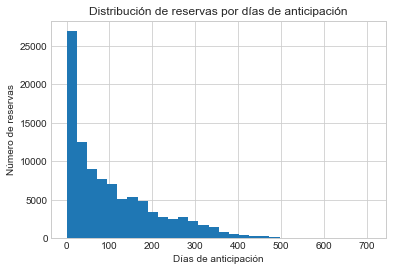

In [482]:
# Con cuantos dias de antelacion suelen reservar 
df['days_in_advance'] = pd.to_timedelta(df['days_in_advance'], unit='D') 

plt.hist(df['days_in_advance'].dt.days, bins=30)
plt.xlabel('Días de anticipación')
plt.ylabel('Número de reservas')
plt.title('Distribución de reservas por días de anticipación')
plt.show()

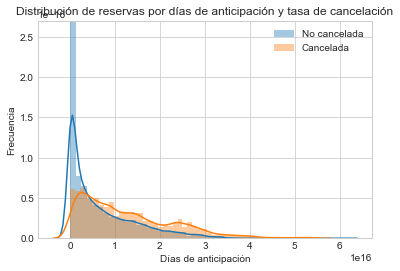

In [502]:
# Distribución de reservas por días de anticipación y tasa de cancelación
sns.distplot(df[df['is_canceled']==0]['days_in_advance'], label='No cancelada')
sns.distplot(df[df['is_canceled']==1]['days_in_advance'], label='Cancelada')
plt.xlabel('Días de anticipación')
plt.ylabel('Frecuencia')
plt.title('Distribución de reservas por días de anticipación y tasa de cancelación')
plt.legend()
plt.show()

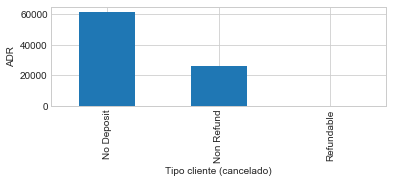

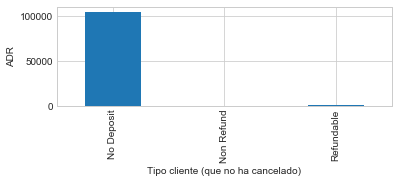

In [479]:
# Tipo de depósito mas común en clientes que cancelan y clientes que no cancelan
grouped1 = df_cancel.groupby('deposit_type')['guests'].sum()
grouped2 = df_notcancel.groupby('deposit_type')['guests'].sum()

#plt.figure(figsize=(10,12))
plt.subplot(211)
grouped1.plot(kind='bar')
plt.xlabel('Tipo cliente (cancelado)')
plt.ylabel('ADR')
plt.show();

#plt.figure(figsize=(10,12))
plt.subplot(212)
grouped2.plot(kind='bar')
plt.xlabel('Tipo cliente (que no ha cancelado)')
plt.ylabel('ADR')
plt.show();

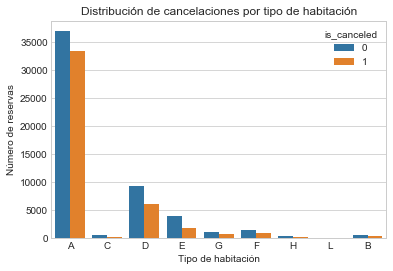

In [483]:
# Número de cancelaciones por tipo de habitación
sns.countplot(x='reserved_room_type', hue='is_canceled', data=df)
plt.xlabel('Tipo de habitación')
plt.ylabel('Número de reservas')
plt.title('Distribución de cancelaciones por tipo de habitación')
plt.show()

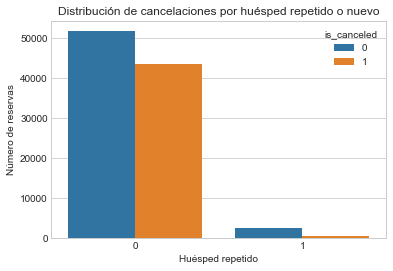

In [484]:
# Cancelaciones segun el huesped sea repetido o no
sns.countplot(x='is_repeated_guest', hue='is_canceled', data=df)
plt.xlabel('Huésped repetido')
plt.ylabel('Número de reservas')
plt.title('Distribución de cancelaciones por huésped repetido o nuevo')
plt.show()

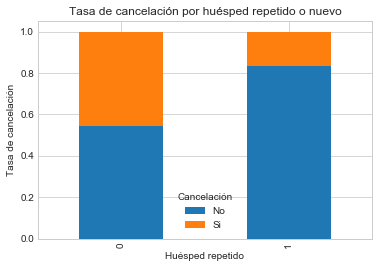

In [487]:
# Tasas de cancelación por huésped repetido o nuevo
ct = pd.crosstab(df['is_repeated_guest'], df['is_canceled'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.xlabel('Huésped repetido')
plt.ylabel('Tasa de cancelación')
plt.title('Tasa de cancelación por huésped repetido o nuevo')
plt.legend(title='Cancelación', labels=['No', 'Si'])
plt.show()

# El argumento 'normalize' en la función 'crosstab' se utiliza para normalizar las frecuencias por fila,
# lo que permitirá visualizar las tasas de cancelación en lugar del número absoluto de reservas canceladas.

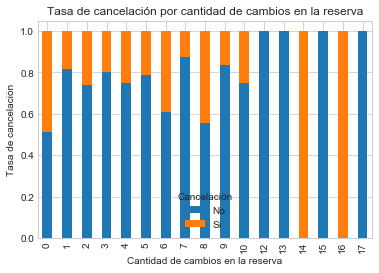

In [494]:
# Tasas de cancelación por cantidad de cambios en la reserva
ct = pd.crosstab(df['booking_changes'], df['is_canceled'], normalize='index') 
ct.plot(kind='bar', stacked=True)

plt.xlabel('Cantidad de cambios en la reserva')
plt.ylabel('Tasa de cancelación')
plt.title('Tasa de cancelación por cantidad de cambios en la reserva')
plt.legend(title='Cancelación', labels=['No', 'Sí'])
plt.show()

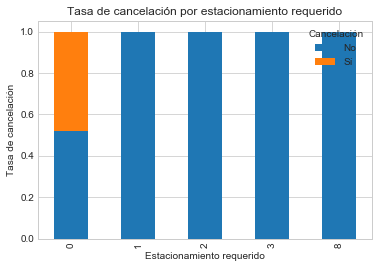

In [495]:
# Tasa de cancelación por estacionamiento requerido
ct = pd.crosstab(df['required_car_parking_spaces'], df['is_canceled'], normalize='index') 
ct.plot(kind='bar', stacked=True)

plt.xlabel('Estacionamiento requerido')
plt.ylabel('Tasa de cancelación')
plt.title('Tasa de cancelación por estacionamiento requerido')
plt.legend(title='Cancelación', labels=['No', 'Sí'])
plt.show()

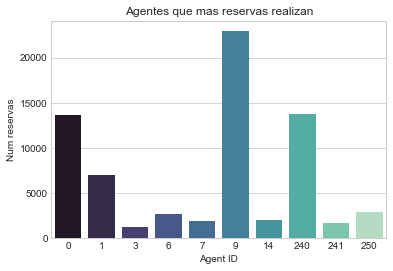

In [548]:
# Agentes con más reservas realizadas
top_agents = df['agent'].value_counts().head(10)
sns.barplot(x=top_agents.index, y=top_agents.values, palette='mako')
plt.title('Agentes que mas reservas realizan')
plt.xlabel('Agent ID')
plt.ylabel('Num reservas')
plt.show()

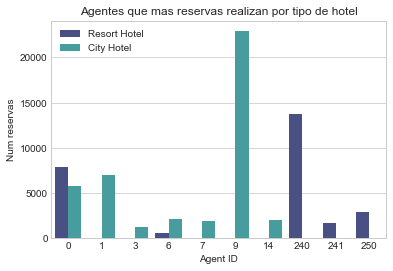

In [549]:
# Agentes que mas reservas realizan por tipo de hotel
top_agents = df['agent'].value_counts().head(10).index.tolist()
top_agents_data = df[df['agent'].isin(top_agents)]
hotel_types = top_agents_data['hotel'].unique()

sns.countplot(x='agent', hue='hotel', data=top_agents_data, palette='mako')
plt.title('Agentes que mas reservas realizan por tipo de hotel')
plt.xlabel('Agent ID')
plt.ylabel('Num reservas')
plt.legend(hotel_types)
plt.show()

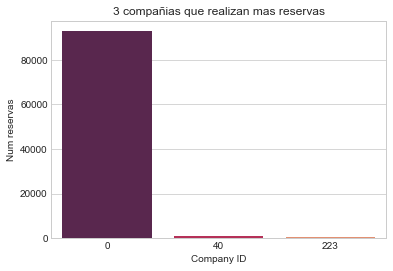

In [528]:
# 3 compañias que realizan mas reservas
top_companies = df['company'].value_counts().head(3)
sns.barplot(x=top_companies.index, y=top_companies.values, palette='rocket')
plt.title('3 compañias que realizan mas reservas')
plt.xlabel('Company ID')
plt.ylabel('Num reservas')
plt.show()

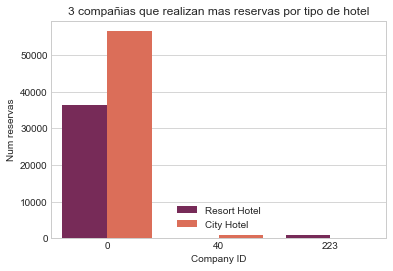

In [529]:
# 3 compañias que realizan mas reservas por tipo de hotel
top_companies = df['company'].value_counts().head(3).index.tolist()
top_companies_data = df[df['company'].isin(top_companies)]
hotel_types = top_companies_data['hotel'].unique()

sns.countplot(x='company', hue='hotel', data=top_companies_data, palette='rocket')
plt.title('3 compañias que realizan mas reservas por tipo de hotel')
plt.xlabel('Company ID')
plt.ylabel('Num reservas')
plt.legend(hotel_types)
plt.show()